## CS6200 HW3 Part2: Link Statistics
a. Number of unique links extracted

b. Frequency distribution by domain

c. Breakdown of links by type (e.g., text, image, video)

d. Average link depth

e. For each crawled page, compute the number of incoming and outgoing links. Report the
top-25 pages with the highest number of incoming and outgoing links.

f. Plot the top-50 domains ranked by highest number of incoming links. Note that this is a
computation for domains (e.g., cnn.com, bbc.co.uk) and not individual pages.

In [165]:
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [223]:
# read extracted links from file
f = open("link_dict_20k.pickle","rb")
link_dict = pickle.load(f)
f.close()

### a. Number of unique links extracted:


In [224]:
# Number of unique links extracted
len(link_dict)

7211

### b. Frequency distribution by domain

In [225]:
def getDomain(url):
    res = urlparse(url)
    return res.netloc

def getDomainDict(link_dict):
    """
    Obtain a domain_dict from link_dict
    domain_dict structure:
        key = domain
        val = {"count": int,
            "incoming": int
            }
    """

    domain_dict = {}
    for link in link_dict:
        domain = getDomain(link)
        if domain in domain_dict:
            domain_dict[domain]["count"]+=1
            domain_dict[domain]["incoming"] += link_dict[link]["incoming"]
        else:
            domain_dict[domain] = {
                "count": 1, 
                "incoming": link_dict[link]["incoming"]
                }
    return domain_dict


In [226]:
domain_dict = getDomainDict(link_dict)

Text(0, 0.5, 'Number of domains')

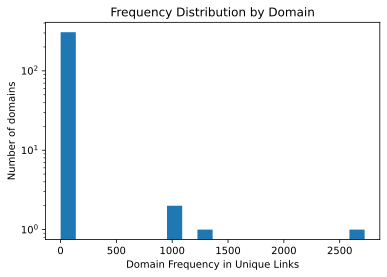

In [227]:
domain_counts = [domain_dict[d]["count"] for d in domain_dict]
plt.hist(domain_counts, bins=20)
plt.yscale('log')
plt.title("Frequency Distribution by Domain")
plt.xlabel("Domain Frequency in Unique Links")
plt.ylabel("Number of domains")

### c. Breakdown of links by type (e.g., text, image, video)

In [228]:
types = [link_dict[l]["type"] for l in link_dict]
type_counts = collections.Counter(types)
type_counts

Counter({'html': 6800,
         'foreign': 95,
         'audio': 23,
         'image': 189,
         'document': 66,
         'non-http': 9,
         'other': 19,
         'asp': 8,
         'video': 2})

In [229]:
for l in link_dict:
    t = link_dict[l].get("type", "n/a")
    if  t== "other":
        print(t, l, sep="\t")

other	https://nobelprize.readme.io/v1.0
other	https://archive.org/details/in.ernet.dli.2015.203547
other	https://web.archive.org/web/20110714080803/http://resources.metapress.com/pdf-preview.axd
other	http://resources.metapress.com/pdf-preview.axd
other	https://creativecommons.org/licenses/by-sa/4.0/deed.en
other	https://commons.wikimedia.org/wiki/User:Viktor_O._Ledenyov
other	https://creativecommons.org/publicdomain/mark/1.0/deed.en
other	https://doi.org/10.1038%2Fnchem.372
other	https://arxiv.org/abs/0808.2517
other	https://doi.org/10.1007%2Fs11192-009-0035-9
other	https://doi.org/10.1007%2FBF01047469
other	https://ui.adsabs.harvard.edu/abs/2009NatCh...1..509.
other	https://web.archive.org/web/20160105221147/https://in.news.yahoo.com/25-years-indias-watergate-bofors-scandal-135113721.html%3B_ylt%3DAlj5KdzFteYFGnJnR7t2kny6scB_%3B_ylu%3DX3oDMTFxbGs3Y3Z1BG1pdANJbmZpbml0ZSBCcm93c2UgVGV4dARwb3MDMQRzZWMDTWVkaWFJbmZpbml0ZUJyb3dzZUxpc3Q-%3B_ylg%3DX3oDMTNpbHR1dmhuBGludGwDaW4EbGFuZwNlbi1pbgRwc

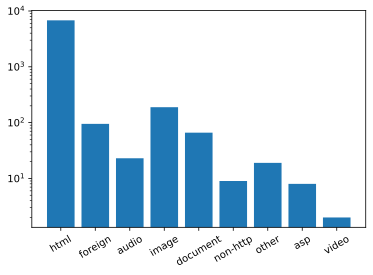

In [236]:
types = list(type_counts.keys())
x = range(len(types))
plt.bar(x, list(type_counts.values()))
plt.xticks(x, types, rotation='30')
plt.yscale('log')


### d. Average link depth

In [237]:
link_depths = [link_dict[l]["depth"] for l in link_dict]
avg_link_depth = sum(link_depths)/len(link_depths)

print("Average link depth = {:.3f}".format(avg_link_depth))

Average link depth = 2.944


Text(0, 0.5, 'Number of Links')

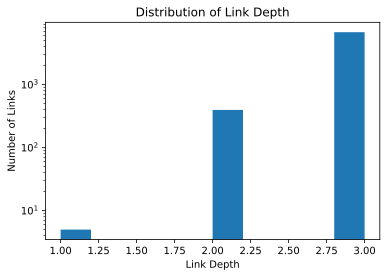

In [238]:
plt.hist(link_depths)
plt.yscale('log')
plt.title("Distribution of Link Depth")
plt.xlabel("Link Depth")
plt.ylabel("Number of Links")

### e. Top-25 Pages with highest number of incoming & outgoing links

Text(0, 0.5, 'Number of Links')

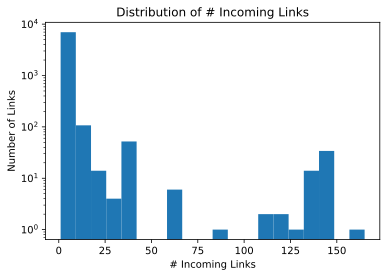

In [239]:
link_incomings = [link_dict[l]["incoming"] for l in link_dict]
plt.hist(link_incomings, bins=20)
plt.yscale('log')
plt.title("Distribution of # Incoming Links")
plt.xlabel("# Incoming Links")
plt.ylabel("Number of Links")

Text(0, 0.5, 'Number of Links')

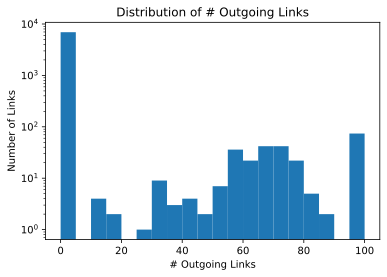

In [240]:
link_outgoings = [link_dict[l]["outgoing"] for l in link_dict]
plt.hist(link_outgoings, bins=20)
plt.yscale('log')
plt.title("Distribution of # Outgoing Links")
plt.xlabel("# Outgoing Links")
plt.ylabel("Number of Links")

In [179]:
# array item: [link:str, {"incoming":int, "outgoing":int, "depth":int}]
link_array = [[l, link_dict[l]] for l in link_dict]

In [241]:
# Top25 links with highest #incomings
link_array.sort(key=lambda x:x[1]["incoming"], reverse=True)
print("Rank  |  #Incomings    |  Url	  ")
print("------------------------------------------------------")

for i in range(25):
    link = link_array[i]
    print(i+1, link[1]["incoming"], "", link[0], sep='\t')


Rank  |  #Incomings    |  Url	  
------------------------------------------------------
1	90		https://www.nobelprize.org
2	89		https://www.nobelprize.org/prizes/facts/nobel-prize-facts/
3	89		https://www.facebook.com/nobelprize/
4	89		https://www.nobelprize.org/alfred-nobel/biographical-information/
5	89		https://www.nobelprize.org/in-depth/
6	89		https://www.nobelprize.org/education-network-nobel-prize-lessons/
7	89		https://www.nobelprize.org/public-events/
8	89		https://www.nobelprize.org/press-room/
9	89		https://www.nobelprize.org/nomination/archive/
10	89		https://www.nobelprize.org/nomination/nomination-and-selection-of-medicine-laureates/
11	89		https://www.nobelprize.org/events/nobel-prize-summit/washington-2020/
12	89		https://www.nobelprize.org/nobel-prize-dialogue/
13	89		https://www.nobelprize.org/nomination/nomination-and-selection-of-physics-laureates/
14	89		https://www.nobelprize.org/nobel-prize-inspiration-initiative/
15	89		https://www.nobelprize.org/nobel-week-dialo

In [242]:
# Top25 links with highest #outgoings
link_array.sort(key=lambda x:x[1]["outgoing"], reverse=True)

print("Rank  |  #Outgoins    |  Url	  ")
print("------------------------------------------------------")

for i in range(25):
    link = link_array[i]
    print(i+1, link[1]["outgoing"], "", link[0], sep='\t')


Rank  |  #Outgoins    |  Url	  
------------------------------------------------------
1	100		https://www.nobelprize.org
2	100		https://www.nobelprize.org/prizes/facts/nobel-prize-facts/
3	100		https://www.britannica.com/videos/Technology
4	100		https://www.britannica.com/browse/Technology
5	100		https://www.britannica.com/summary
6	100		https://www.britannica.com/browse/Health-Medicine
7	100		https://www.britannica.com/browse/Philosophy-Religion
8	100		https://www.britannica.com/browse/Visual-Arts
9	100		https://www.britannica.com/videos/Sports-Recreation
10	100		https://www.britannica.com/browse/World-History
11	100		https://www.britannica.com/videos/Science
12	100		https://www.britannica.com/quiz/browse
13	100		https://www.britannica.com/browse/Lifestyles-Social-Issues
14	100		https://www.britannica.com/browse/Politics-Law-Government
15	100		https://www.britannica.com/browse/Literature
16	100		https://www.britannica.com/browse/Geography-Travel
17	100		https://www.britannica.com/vide

### f. Top-50 domains ranked by highest number of incoming links.

In [243]:
# number of unique domains
len(domain_dict)

311

In [244]:
domain_array = [[d, domain_dict[d]] for d in domain_dict]

In [245]:
# Top-50 domians with highest #incomings
domain_array.sort(key=lambda x:x[1]["incoming"], reverse=True)
print("Rank  |  #Incomings    |  Domain	         ")
print("---------------------------------------")

for i in range(50):
    domain = domain_array[i]
    print(i+1, domain[1]["incoming"], "", domain[0], sep='\t')


Rank  |  #Incomings    |  Domain	         
---------------------------------------
1	8598		www.nobelprize.org
2	3618		en.wikipedia.org
3	2755		www.britannica.com
4	2304		www.facebook.com
5	309		twitter.com
6	244		www.linkedin.com
7	225		www.nytimes.com
8	213		www.youtube.com
9	159		www.instagram.com
10	128		corporate.britannica.com
11	120		
12	117		cn.nytimes.com
13	72		kids.britannica.com
14	56		help.nytimes.com
15	50		facebook.com
16	40		nobelprize.org
17	34		premium.britannica.com
18	33		cdn.britannica.com
19	33		www.merriam-webster.com
20	32		www.nobelprizemedicine.org
21	31		commons.wikimedia.org
22	27		nobelweeklights.se
23	26		l.facebook.com
24	26		www.kva.se
25	24		instagram.com
26	24		www.wikidata.org
27	22		www.nytco.com
28	21		web.archive.org
29	19		upload.wikimedia.org
30	16		youtu.be
31	14		cloud.email.britannica.com
32	14		www.pinterest.com
33	11		nytmediakit.com
34	11		spiderbites.nytimes.com
35	11		myaccount.nytimes.com
36	11		www.tbrandstudio.com
37	11		ar.wikipedia.or

In [221]:
b = "https://www.youtube.com/watch"
n = 'https://www.britannica.com/topic/Nobel-Prize'
page = requests.get(n)
soup = BeautifulSoup(page.text, "html.parser")


In [222]:
# soup.body.find(string=re.compile('.*nobel.*', re.I), recursive=True)
soup.body.find(string=re.compile("nobel", re.I))

'Nobel Prize'